In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'labels.csv', 'sample_submission.csv']


In [36]:
trainlist = os.listdir("../input/train")
testlist = os.listdir("../input/test")
df_sample = pd.read_csv('../input/sample_submission.csv')
df_labels = pd.read_csv('../input/labels.csv')

Printing the first 5 rows of each dataframes :

In [37]:
df_sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [38]:
df_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [39]:
df_labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,6f86de5ce20b6ac43e0c4387a8014d26,scottish_deerhound
freq,1,126


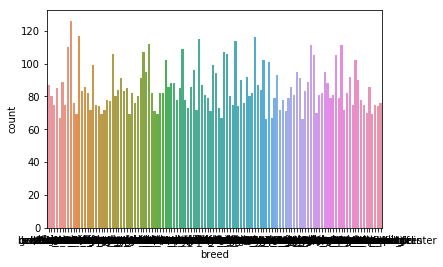

In [41]:
import seaborn as sns
sns.countplot(x='breed',data = df_labels)

The groups look balanced enough. We proceed to preprocessing the data. First we set the Y, or label data as one hot vectors.

In [80]:
from keras.utils import to_categorical
from numpy import array
breeds = df_labels['breed'].tolist()
breed = df_labels['breed'].unique()
unq_to_breed = dict()
for i in range(len(df_labels)):
    unq_to_breed[str(df_labels['id'][i])]=(df_labels['breed'][i])
breed_to_id = dict((j,i) for i,j in enumerate(breed))
id_list = to_categorical(list(breed_to_id.values())).astype(np.float32)
unq_to_breed

{'000bec180eb18c7604dcecc8fe0dba07': 'boston_bull',
 '001513dfcb2ffafc82cccf4d8bbaba97': 'dingo',
 '001cdf01b096e06d78e9e5112d419397': 'pekinese',
 '00214f311d5d2247d5dfe4fe24b2303d': 'bluetick',
 '0021f9ceb3235effd7fcde7f7538ed62': 'golden_retriever',
 '002211c81b498ef88e1b40b9abf84e1d': 'bedlington_terrier',
 '00290d3e1fdd27226ba27a8ce248ce85': 'bedlington_terrier',
 '002a283a315af96eaea0e28e7163b21b': 'borzoi',
 '003df8b8a8b05244b1d920bb6cf451f9': 'basenji',
 '0042188c895a2f14ef64a918ed9c7b64': 'scottish_deerhound',
 '004396df1acd0f1247b740ca2b14616e': 'shetland_sheepdog',
 '0067dc3eab0b3c3ef0439477624d85d6': 'walker_hound',
 '00693b8bc2470375cc744a6391d397ec': 'maltese_dog',
 '006cc3ddb9dc1bd827479569fcdc52dc': 'bluetick',
 '0075dc49dab4024d12fafe67074d8a81': 'norfolk_terrier',
 '00792e341f3c6eb33663e415d0715370': 'african_hunting_dog',
 '007b5a16db9d9ff9d7ad39982703e429': 'wire-haired_fox_terrier',
 '007b8a07882822475a4ce6581e70b1f8': 'redbone',
 '007ff9a78eba2aebb558afea3a51c469'

In [46]:
breed_to_id

{'affenpinscher': 24,
 'afghan_hound': 74,
 'african_hunting_dog': 13,
 'airedale': 63,
 'american_staffordshire_terrier': 68,
 'appenzeller': 46,
 'australian_terrier': 42,
 'basenji': 7,
 'basset': 41,
 'beagle': 95,
 'bedlington_terrier': 5,
 'bernese_mountain_dog': 67,
 'black-and-tan_coonhound': 22,
 'blenheim_spaniel': 110,
 'bloodhound': 47,
 'bluetick': 3,
 'border_collie': 53,
 'border_terrier': 33,
 'borzoi': 6,
 'boston_bull': 0,
 'bouvier_des_flandres': 115,
 'boxer': 17,
 'brabancon_griffon': 80,
 'briard': 91,
 'brittany_spaniel': 50,
 'bull_mastiff': 66,
 'cairn': 23,
 'cardigan': 70,
 'chesapeake_bay_retriever': 92,
 'chihuahua': 58,
 'chow': 82,
 'clumber': 72,
 'cocker_spaniel': 118,
 'collie': 55,
 'curly-coated_retriever': 106,
 'dandie_dinmont': 93,
 'dhole': 31,
 'dingo': 1,
 'doberman': 18,
 'english_foxhound': 87,
 'english_setter': 27,
 'english_springer': 117,
 'entlebucher': 54,
 'eskimo_dog': 78,
 'flat-coated_retriever': 83,
 'french_bulldog': 114,
 'german

In [81]:
#we have unq to breed and breed to id so now we create unq to id ! 
unq_to_id = dict()
for i in unq_to_breed : 
    unq_to_id[i] = id_list[breed_to_id[unq_to_breed[i]]]
unq_to_id

{'000bec180eb18c7604dcecc8fe0dba07': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.], dtype=float32),
 '001513dfcb2ffafc82cccf4d8bbaba97': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

As Unq_to_id is our final preprocessing stuff, let's see what it actually is :
---

In [97]:
print("length : ",len(unq_to_id))
print("First element :",unq_to_id["000bec180eb18c7604dcecc8fe0dba07"])
print("Element length : ",len(unq_to_id["000bec180eb18c7604dcecc8fe0dba07"]))
print("\nLets see if all's well\n")
print("Checking for 0f04466edd10d6c1d27e123399cf4433")
print("unq to breed : ",unq_to_breed["0f04466edd10d6c1d27e123399cf4433"])
print("breed to id : ",breed_to_id[unq_to_breed["0f04466edd10d6c1d27e123399cf4433"]])
print("unq to id : ",unq_to_id["0f04466edd10d6c1d27e123399cf4433"])

length :  10222
First element : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Element length :  120

Lets see if all's well

Checking for 0f04466edd10d6c1d27e123399cf4433
unq to breed :  australian_terrier
breed to id :  42
unq to id :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Thus we see that the unq_to_id ( unique to id ) dict contains a mapping from id to one hot encoded vectors of length 120. All's cool till now.
---

The Y part is done. Now off to preprocessing the images as X.

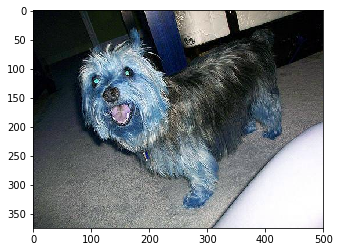

In [98]:
#Plotting a random image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("../input/train/0f04466edd10d6c1d27e123399cf4433.jpg")
%matplotlib inline
imgplot = plt.imshow(image)

In [138]:
#storing all images in a variable X
X = []
Y = []
for i in range(len(trainlist)):
    image = cv2.imread("../input/train/"+trainlist[i])
    image = cv2.resize(image,(120,120), interpolation = cv2.INTER_CUBIC)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    X.append(image)
    Y.append(unq_to_id[trainlist[i][0:len(trainlist[i])-4]])
print("Preprocessing done")    

Preprocessing done


In [139]:
X=np.array(X)
X=X.reshape(len(X),120,120,1)
X.shape[1:]

(120, 120, 1)

In [114]:
X.shape

(10222, 120, 120, 1)

In [117]:
Y=np.array(Y)
class_totals = Y.sum(axis=0)
class_weight = class_totals.max() / class_totals
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [124]:
print("X length : ",len(X))
print("Y length : ",len(Y))
print("X.shape : ", X.shape)
print("Y.shape : ", Y.shape)

X length :  10222
Y length :  10222
X.shape :  (10222, 120, 120, 1)
Y.shape :  (10222, 120)


Now we build our model using keras ! 
---

In [119]:
from keras.utils import np_utils
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [134]:
nb_filters = 32
nb_classes = 120
nb_pool = 2
nb_conv = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 118, 118, 32)      320       
_________________________________________________________________
activation_108 (Activation)  (None, 118, 118, 32)      0         
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 57, 57, 64)        18496     
_________________________________________________________________
activation_109 (Activation)  (None, 57, 57, 64)        0         
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 26, 26, 64)        36928     
__________

In [135]:
validation_split = 0.10
model.fit(X, Y, batch_size=20, class_weight=class_weight, epochs=10, verbose=1, validation_split=validation_split)

Train on 9199 samples, validate on 1023 samples
Epoch 1/10
9199/9199 [==============================] - 14s 1ms/step - loss: 4.8080 - acc: 0.0068 - val_loss: 4.7852 - val_acc: 0.0088
Epoch 2/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.7659 - acc: 0.0150 - val_loss: 4.7695 - val_acc: 0.0078
Epoch 3/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.6566 - acc: 0.0204 - val_loss: 4.6656 - val_acc: 0.0186
Epoch 4/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.5505 - acc: 0.0279 - val_loss: 4.5227 - val_acc: 0.0293
Epoch 5/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.4602 - acc: 0.0340 - val_loss: 4.5186 - val_acc: 0.0342
Epoch 6/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.3801 - acc: 0.0412 - val_loss: 4.4705 - val_acc: 0.0391
Epoch 7/10
9199/9199 [==============================] - 12s 1ms/step - loss: 4.3097 - acc: 0.0473 - val_loss: 4.4872 - val_acc: 0.0342
Epoch 8

As expected the accuracy is low as we are not using pretrained weights and training the model on local system itself. Let's try with VGG19 model next : 

In [144]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
vgg = VGG19(#weights='imagenet',
    weights = None, include_top=False, input_shape=(120, 120, 1))
x = vgg.output
x = Flatten()(x)
predictions = Dense(nb_classes, activation='softmax')(x)
vggmodel = Model(inputs=vgg.input, outputs=predictions)
for layer in vgg.layers:
    layer.trainable = False

vggmodel.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
vggmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 120, 120, 1)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 120, 64)      640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 120, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 30, 128)       0         
__________

In [148]:
validation_split = 0.10
vggmodel.fit(X, np.array(Y), batch_size=20, class_weight=class_weight, epochs=10, verbose=1, validation_split=validation_split)

Train on 9199 samples, validate on 1023 samples
Epoch 1/10
9199/9199 [==============================] - 50s 5ms/step - loss: 4.8477 - acc: 0.0112 - val_loss: 4.8085 - val_acc: 0.0108
Epoch 2/10
9199/9199 [==============================] - 47s 5ms/step - loss: 4.7382 - acc: 0.0189 - val_loss: 4.7389 - val_acc: 0.0196
Epoch 3/10
9199/9199 [==============================] - 47s 5ms/step - loss: 4.6672 - acc: 0.0292 - val_loss: 4.7420 - val_acc: 0.0244
Epoch 4/10
9199/9199 [==============================] - 47s 5ms/step - loss: 4.6147 - acc: 0.0289 - val_loss: 4.7309 - val_acc: 0.0215
Epoch 5/10
9199/9199 [==============================] - 47s 5ms/step - loss: 4.5637 - acc: 0.0369 - val_loss: 4.6876 - val_acc: 0.0381
Epoch 6/10
9199/9199 [==============================] - 47s 5ms/step - loss: 4.5138 - acc: 0.0435 - val_loss: 4.6411 - val_acc: 0.0283
Epoch 7/10
9199/9199 [==============================] - 47s 5ms/step - loss: 4.4787 - acc: 0.0461 - val_loss: 4.6621 - val_acc: 0.0303
Epoch 8

As we see, we don't get good accuracy as we don't use fully trained weights.